In [18]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
np.set_printoptions(threshold=np.inf)

In [29]:
def add_to_array(path, target_value, image_amount):
    arr_x = []
    arr_y = []
    for i in range(1, image_amount):
        image = Image.open(path + f'{i}.png').resize((36,36))
        img_arr = np.asarray(image).flatten()
        arr_x.append(img_arr.T)
        arr_y.append(target_value)  
    return (arr_x, arr_y)


data = {
        0: add_to_array(f'Segmented/Segmented/Black-grass/', 0, 250),
        1: add_to_array(f'Segmented/Segmented/Charlock/', 1, 250 ),
        2: add_to_array( f'Segmented/Segmented/Cleavers/', 2, 250 ), 
        3: add_to_array(f'Segmented/Segmented/Common Chickweed/', 3, 250 ),
        4: add_to_array(f'Segmented/Segmented/Common wheat/', 4, 250 ),
        5: add_to_array( f'Segmented/Segmented/Fat Hen/', 5, 250 ), 
        6: add_to_array(f'Segmented/Segmented/Loose Silky-bent/', 6, 250 ), 
        7: add_to_array( f'Segmented/Segmented/Maize/', 7, 250 ), 
        8:  add_to_array(f'Segmented/Segmented/Scentless Mayweed/', 8, 250 ), 
        9: add_to_array(f'Segmented/Segmented/Shepherds Purse/', 9, 250 ), 
        10: add_to_array(f'Segmented/Segmented/Small-flowered Cranesbill/', 10, 250 ), 
        11: add_to_array(f'Segmented/Segmented/Sugar beet/', 11, 250 )
        }

X = np.array(data[0][0])
y = np.array(data[0][1])
for i in range(1, 12):
    X = np.vstack((X, np.array(data[i][0])))
    y = np.append(y, data[i][1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,   
    test_size = 0.2, random_state=10, shuffle=True
)
unscaled_X_train = X_train
unscaled_X_test = X_test
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [30]:

"""Deprecated 
iterations = []
accuracy_training = []
accuracy_test = []
# DEFAULT penalty of none against iterations
for i in range(1, 51):
    logreg = linear_model.LogisticRegression(penalty = 'none', max_iter=2*i)
    logreg.fit(X_train, y_train)
    y_hat_logreg_test_no_penalty = logreg.predict(X_test)
    y_hat_logreg_train_no_penalty = logreg.predict(X_train)
    training_accuracy = accuracy_score(y_true=y_train, y_pred=y_hat_logreg_train_no_penalty)
    test_accuracy_logreg = accuracy_score(y_true=y_test, y_pred=y_hat_logreg_test_no_penalty)
    accuracy_training.append(training_accuracy)
    accuracy_test.append(test_accuracy_logreg)
    iterations.append(i*2)
    if not (2*i % 20):
        print("iteraiotns is", i*2)
        print("test accfuracy ",test_accuracy_logreg)
        print("trainign accuracy ", training_accuracy)

plot_function(accuracy_training, accuracy_test,iterations, "iterations" , 110, "linear")

# accuracy = 0.6413l"""

'Deprecated \niterations = []\naccuracy_training = []\naccuracy_test = []\n# DEFAULT penalty of none against iterations\nfor i in range(1, 51):\n    logreg = linear_model.LogisticRegression(penalty = \'none\', max_iter=2*i)\n    logreg.fit(X_train, y_train)\n    y_hat_logreg_test_no_penalty = logreg.predict(X_test)\n    y_hat_logreg_train_no_penalty = logreg.predict(X_train)\n    training_accuracy = accuracy_score(y_true=y_train, y_pred=y_hat_logreg_train_no_penalty)\n    test_accuracy_logreg = accuracy_score(y_true=y_test, y_pred=y_hat_logreg_test_no_penalty)\n    accuracy_training.append(training_accuracy)\n    accuracy_test.append(test_accuracy_logreg)\n    iterations.append(i*2)\n    if not (2*i % 20):\n        print("iteraiotns is", i*2)\n        print("test accfuracy ",test_accuracy_logreg)\n        print("trainign accuracy ", training_accuracy)\n\nplot_function(accuracy_training, accuracy_test,iterations, "iterations" , 110, "linear")\n\n# accuracy = 0.6413l'

In [14]:
# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg
def training_with_regularization(X_train, X_test, y_train, y_test, regularization_type, solver="liblinear", iterations=75):
    C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]
    accuracies = {}
    for penalty in C:
        logreg = linear_model.LogisticRegression(penalty = regularization_type, C = penalty, solver=solver, max_iter=iterations)
        logreg.fit(X_train, y_train )
        y_hat_logreg_validation = logreg.predict(X_test)
        y_hat_logreg_test  = logreg.predict(X_train)
        acc_logreg_validation = accuracy_score(y_true=y_test, y_pred=y_hat_logreg_validation)
        acc_logreg_training = accuracy_score(y_true=y_train, y_pred=y_hat_logreg_test)
        accuracies[penalty] = (acc_logreg_validation, acc_logreg_training)

    print("C values are:")
    for C_values in accuracies:
        print(C_values, end=" ")
    
    print("Test accuracy are:")
    for C_values in accuracies:
        print(round(accuracies[C_values][0], 4), end=" " )
    
    print("Training accuracy are:")
    for C_values in accuracies:
        print(round(accuracies[C_values][1], 4), end=" ")
    return accuracies




In [4]:
def place_data(accuracies):
    training_data = []
    test_data = []
    C_values = []
    for c in accuracies:
        C_values.append(c)
        training_data.append(accuracies[c][1])
        test_data.append(accuracies[c][0])
    return training_data, test_data, C_values


In [5]:
def plot_function(training_data, test_data, c_values, x_axis_label, x_axis_high, graph_title, x_axis_scale="log"):
    plt.plot(c_values, training_data, "r-", c_values, test_data, "g-")
    plt.title(graph_title)
    plt.xlabel(x_axis_label)
    plt.xscale(x_axis_scale)
    plt.xlim([0, x_axis_high])
    plt.ylabel("Training Accuracy(r)/Test Accuracy(g)")
    plt.show()


C values are:
1e-07 1e-05 0.001 0.01 0.1 1 10 100 10000 1000000 Test accuracy are:
0.0987 0.0987 0.0836 0.3445 0.5619 0.5435 0.5385 0.5702 0.5201 0.5084 Training accuracy are:
0.0795 0.0795 0.0833 0.3967 0.9318 1.0 1.0 1.0 1.0 1.0 

C:\Users\usaid\AppData\Local\Temp\ipykernel_12712\3109750076.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, x_axis_high])


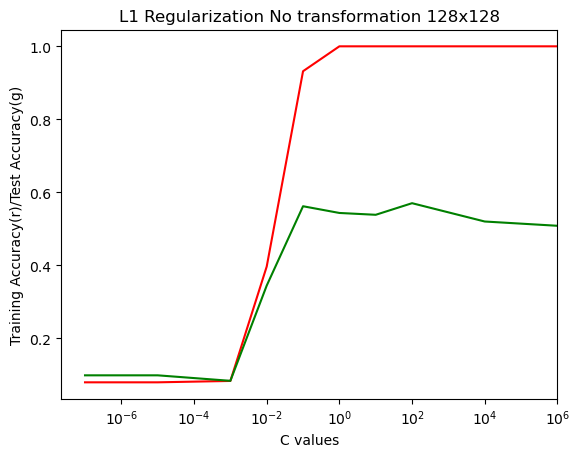

In [15]:
# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg
all_accuracies = training_with_regularization(X_train=X_train, X_test=X_test,
                                              y_train=y_train, y_test=y_test, 
                             regularization_type="l1", iterations=80)


place_data(all_accuracies)
data = place_data(all_accuracies)
plot_function(data[0], data[1], data[2], "C values", 1000000, graph_title = "L1 Regularization No transformation 128x128", x_axis_scale="log")

In [35]:
#no scaling
"""
X_squared_test = unscaled_X_test**2
X_squared_train = unscaled_X_train**2

# no penalties
logreg = linear_model.LogisticRegression(penalty = 'none', max_iter=80)
logreg.fit(X_squared_train, y_train)
y_hat_squared_logreg_test = logreg.predict(X_squared_test)
y_hat_squared_logreg_training = logreg.predict(X_squared_train)
training_accuracy = accuracy_score(y_true=y_train, y_pred=y_hat_squared_logreg_training)
test_accuracy_logreg = accuracy_score(y_true=y_test, y_pred=y_hat_squared_logreg_test)
print(training_accuracy)
print(test_accuracy_logreg)

# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg
all_accuracies_l2 = training_with_regularization(X_train=X_squared_train, X_test=X_squared_test, y_train=y_train, y_test=y_test, 
                             regularization_type="l2")
data = place_data(all_accuracies_l2)
plot_function(data[0], data[1], data[2], "C values", 1000000, x_axis_scale="log")"""

'\nX_squared_test = unscaled_X_test**2\nX_squared_train = unscaled_X_train**2\n\n# no penalties\nlogreg = linear_model.LogisticRegression(penalty = \'none\', max_iter=80)\nlogreg.fit(X_squared_train, y_train)\ny_hat_squared_logreg_test = logreg.predict(X_squared_test)\ny_hat_squared_logreg_training = logreg.predict(X_squared_train)\ntraining_accuracy = accuracy_score(y_true=y_train, y_pred=y_hat_squared_logreg_training)\ntest_accuracy_logreg = accuracy_score(y_true=y_test, y_pred=y_hat_squared_logreg_test)\nprint(training_accuracy)\nprint(test_accuracy_logreg)\n\n# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg\nall_accuracies_l2 = training_with_regularization(X_train=X_squared_train, X_test=X_squared_test, y_train=y_train, y_test=y_test, \n                             regularization_type="l2")\ndata = place_data(all_accuracies_l2)\nplot_function(data[0], data[1], data[2], "C values", 1000000, x_axis_scale="log")'

C values are:
1e-07 1e-05 0.001 0.01 0.1 1 10 100 10000 1000000 Test accuracy are:
0.0987 0.0987 0.0836 0.2776 0.4766 0.4833 0.4632 0.4933 0.4866 0.4933 Training accuracy are:
0.0795 0.0795 0.0833 0.3686 0.9983 1.0 1.0 1.0 1.0 1.0 

C:\Users\usaid\AppData\Local\Temp\ipykernel_12712\3109750076.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, x_axis_high])


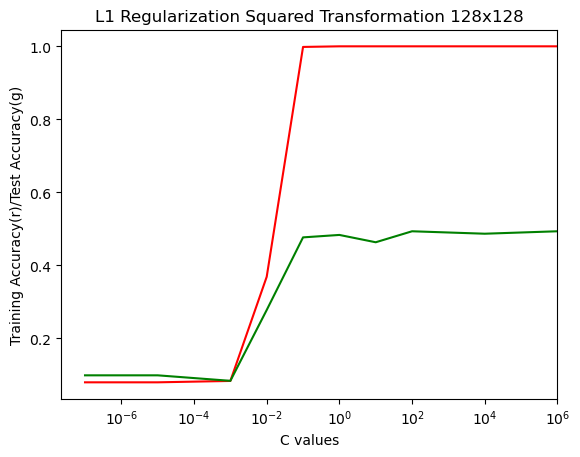

In [16]:
#scaling
X_squared_test = unscaled_X_test**2
X_squared_train = unscaled_X_train**2
X_squared_test = scale.fit_transform(X_squared_test)
X_squared_train = scale.fit_transform(X_squared_train)

# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg
all_accuracies_l2 = training_with_regularization(X_train=X_squared_train, X_test=X_squared_test, y_train=y_train, y_test=y_test, 
                             regularization_type="l1")
data = place_data(all_accuracies_l2)
plot_function(data[0], data[1], data[2], "C values", 1000000, graph_title="L1 Regularization Squared Transformation 128x128", x_axis_scale="log")

In [ ]:
#no scaling cubed
"""
X_cubed_test = unscaled_X_test**3
X_cubed_train = unscaled_X_train**3

# no penalties
logreg = linear_model.LogisticRegression(penalty = 'none', max_iter=80)
logreg.fit(X_cubed_train, y_train)
y_hat_cubed_logreg_test = logreg.predict(X_cubed_test)
y_hat_cubed_logreg_training = logreg.predict(X_cubed_train)
training_accuracy = accuracy_score(y_true=y_train, y_pred=y_hat_cubed_logreg_training)
test_accuracy_logreg = accuracy_score(y_true=y_test, y_pred=y_hat_cubed_logreg_test)
print(training_accuracy)
print(test_accuracy_logreg)

# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg
all_accuracies_l2 = training_with_regularization(X_train=X_cubed_train, X_test=X_cubed_test, y_train=y_train, y_test=y_test, 
                             regularization_type="l2")
data = place_data(all_accuracies_l2)
plot_function(data[0], data[1], data[2], "C values", 1000000, x_axis_scale="log")"""

'\nX_cubed_test = unscaled_X_test**3\nX_cubed_train = unscaled_X_train**3\n\n# no penalties\nlogreg = linear_model.LogisticRegression(penalty = \'none\', max_iter=80)\nlogreg.fit(X_cubed_train, y_train)\ny_hat_cubed_logreg_test = logreg.predict(X_cubed_test)\ny_hat_cubed_logreg_training = logreg.predict(X_cubed_train)\ntraining_accuracy = accuracy_score(y_true=y_train, y_pred=y_hat_cubed_logreg_training)\ntest_accuracy_logreg = accuracy_score(y_true=y_test, y_pred=y_hat_cubed_logreg_test)\nprint(training_accuracy)\nprint(test_accuracy_logreg)\n\n# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg\nall_accuracies_l2 = training_with_regularization(X_train=X_cubed_train, X_test=X_cubed_test, y_train=y_train, y_test=y_test, \n                             regularization_type="l2")\ndata = place_data(all_accuracies_l2)\nplot_function(data[0], data[1], data[2], "C values", 1000000, x_axis_scale="log")'

C values are:
1e-07 1e-05 0.001 0.01 0.1 1 10 100 10000 1000000 Test accuracy are:
0.0987 0.0987 0.0836 0.2575 0.4164 0.4247 0.4348 0.4582 0.4615 0.4231 Training accuracy are:
0.0795 0.0795 0.0833 0.3603 0.9987 1.0 1.0 1.0 1.0 1.0 

C:\Users\usaid\AppData\Local\Temp\ipykernel_12712\3109750076.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, x_axis_high])


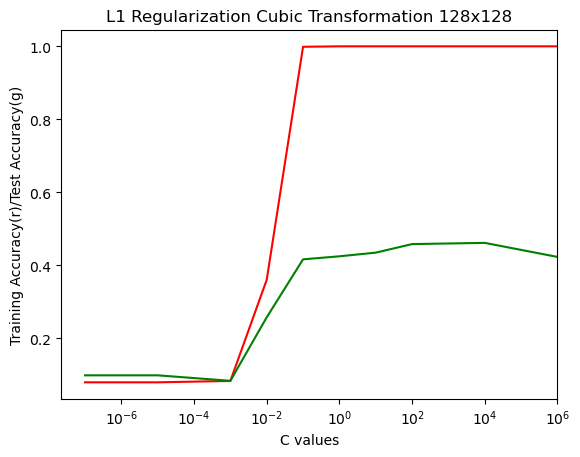

In [17]:
#scaling cubed
X_cubed_test = unscaled_X_test**3
X_cubed_train = unscaled_X_train**3
X_cubed_test = scale.fit_transform(X_cubed_test)
X_cubed_train = scale.fit_transform(X_cubed_train)


# penalties of f C = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, and 1000000] L2 reg
all_accuracies_l2 = training_with_regularization(X_train=X_cubed_train, X_test=X_cubed_test, y_train=y_train, y_test=y_test, 
                             regularization_type="l1",)
data = place_data(all_accuracies_l2)
plot_function(data[0], data[1], data[2], "C values", 1000000, graph_title="L1 Regularization Cubic Transformation 128x128",  x_axis_scale="log")

Neural Network Activation Function: relu Hidden Layers (100,), alpha value is 1e-07, training_accuracy is 1.0,                   testing accuracy is 0.7747349823321554
Neural Network Activation Function: relu Hidden Layers (100,), alpha value is 1e-05, training_accuracy is 1.0,                   testing accuracy is 0.773851590106007
Neural Network Activation Function: relu Hidden Layers (100,), alpha value is 0.001, training_accuracy is 1.0,                   testing accuracy is 0.7818021201413428
Neural Network Activation Function: relu Hidden Layers (100,), alpha value is 0.01, training_accuracy is 1.0,                   testing accuracy is 0.7809187279151943
Neural Network Activation Function: relu Hidden Layers (100,), alpha value is 0.1, training_accuracy is 0.9993373094764745,                   testing accuracy is 0.7685512367491166
Neural Network Activation Function: relu Hidden Layers (100,), alpha value is 1, training_accuracy is 0.9988955157941242,                   testing a

c:\Users\usaid\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Activation Function: logistic Hidden Layers (100, 50, 30), alpha value is 1, training_accuracy is 0.887784404683013,                   testing accuracy is 0.661660777385159
Neural Network Activation Function: logistic Hidden Layers (100, 50, 30), alpha value is 10, training_accuracy is 0.14358294676386127,                   testing accuracy is 0.14929328621908128
Neural Network Activation Function: logistic Hidden Layers (100, 50, 30), alpha value is 100, training_accuracy is 0.14358294676386127,                   testing accuracy is 0.14929328621908128
Neural Network Activation Function: logistic Hidden Layers (100, 50, 30), alpha value is 10000, training_accuracy is 0.14358294676386127,                   testing accuracy is 0.14929328621908128
Neural Network Activation Function: logistic Hidden Layers (100, 50, 30), alpha value is 1000000, training_accuracy is 0.14358294676386127,                   testing accuracy is 0.14929328621908128
Neural Network Activation Funct

C:\Users\usaid\AppData\Local\Temp\ipykernel_6424\3109750076.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, x_axis_high])


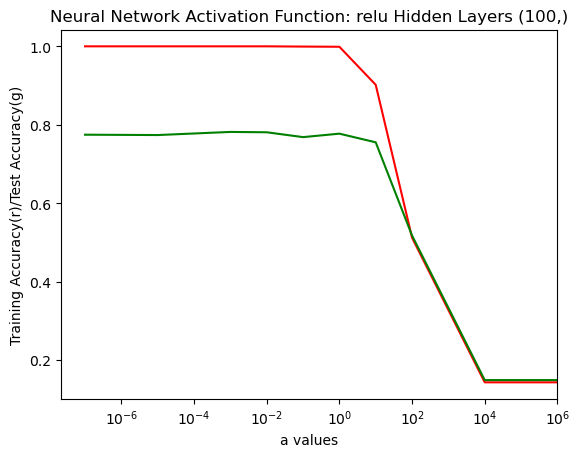

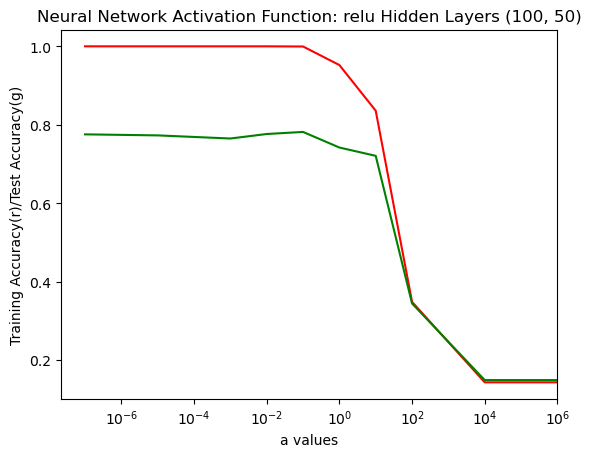

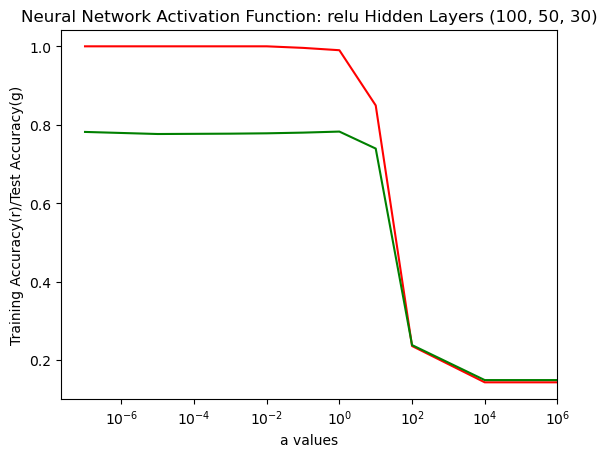

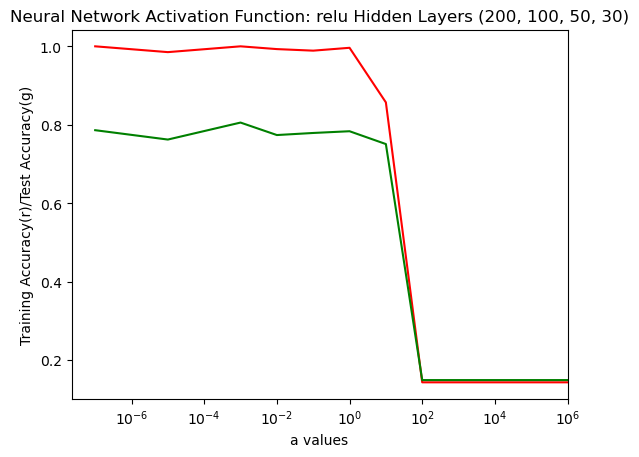

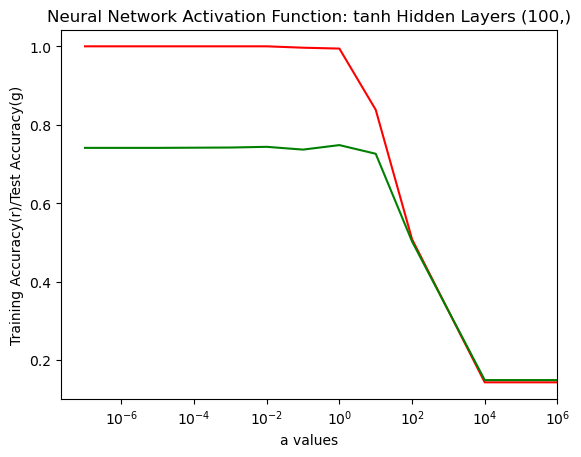

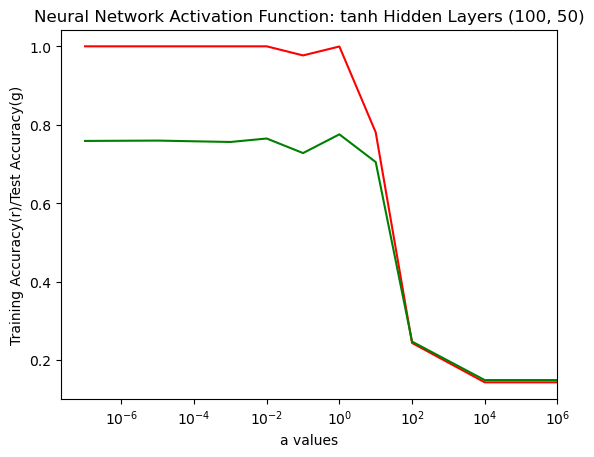

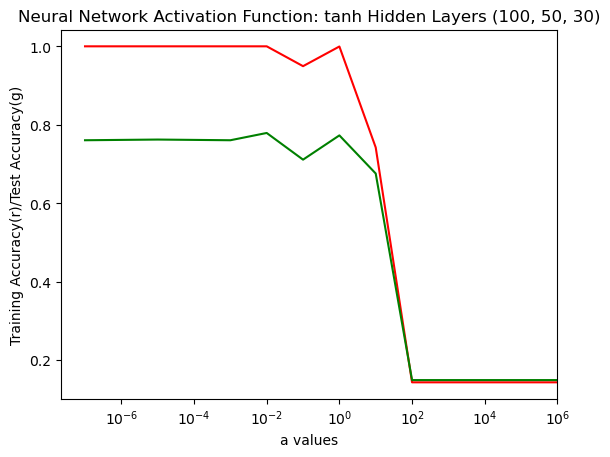

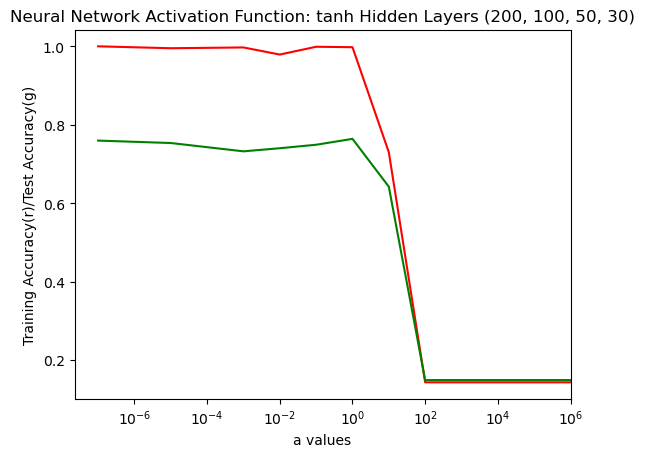

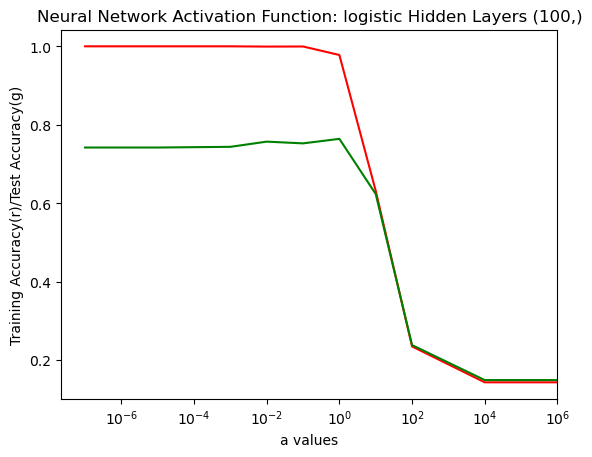

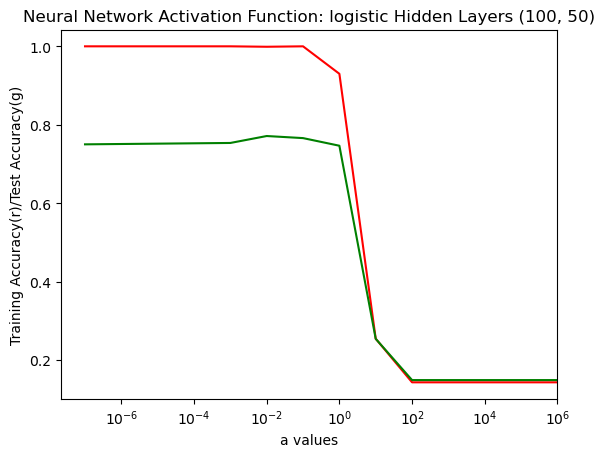

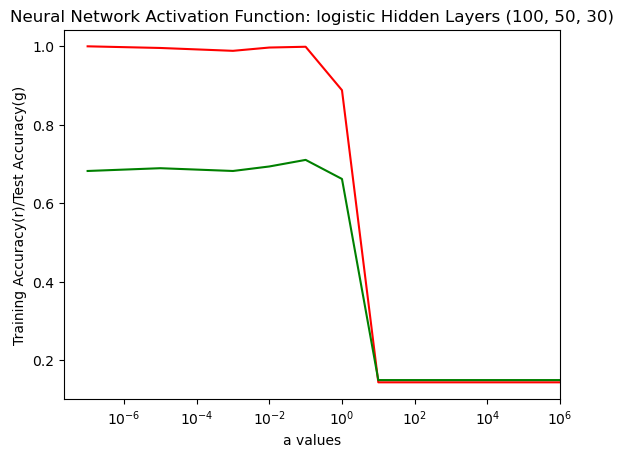

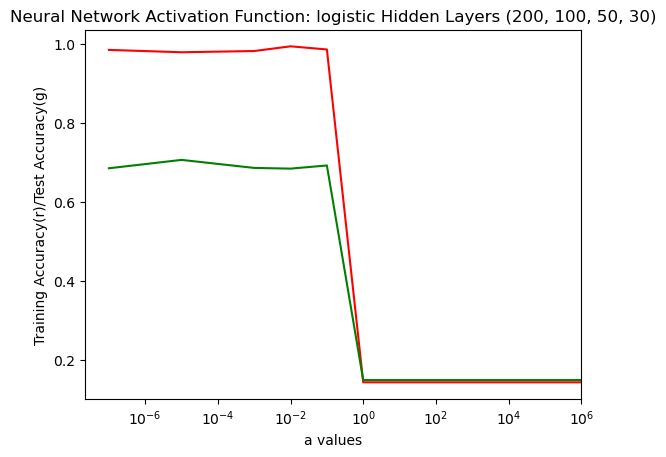

In [7]:


activations = ["relu", "tanh", "logistic"]
hidden_layers = [(100,), (100, 50), (100, 50, 30), (200, 100, 50, 30)]
a_values = [0.0000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]
combos = {}
for activation in activations:
    for layer in hidden_layers:
        for a_value in a_values:
            NN = MLPClassifier(random_state=1, alpha=a_value, activation=activation, 
                               hidden_layer_sizes=layer)
            NN.fit(X_train, y_train)
            y_hat_train = NN.predict(X_train)
            y_hat_test = NN.predict(X_test)
            training_accuracy = accuracy_score(y_pred=y_hat_train, y_true=y_train)
            test_accuracy = accuracy_score(y_pred=y_hat_test, y_true=y_test)
            print(f'Neural Network Activation Function: {activation} Hidden Layers {layer}, alpha value is {a_value}, training_accuracy is {training_accuracy}, \
                  testing accuracy is {test_accuracy}')
            if not f'Neural Network Activation Function: {activation} Hidden Layers {layer}' in combos:
                combos[f'Neural Network Activation Function: {activation} Hidden Layers {layer}'] = [[training_accuracy], [test_accuracy]]
            else:
                combos[ f'Neural Network Activation Function: {activation} Hidden Layers {layer}'][0].append(training_accuracy)
                combos[ f'Neural Network Activation Function: {activation} Hidden Layers {layer}'][1].append(test_accuracy)
                
for title in combos:
    plot_function(combos[title][0], combos[title][1], a_values, "a values", 1000000, title)

c:\Users\usaid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


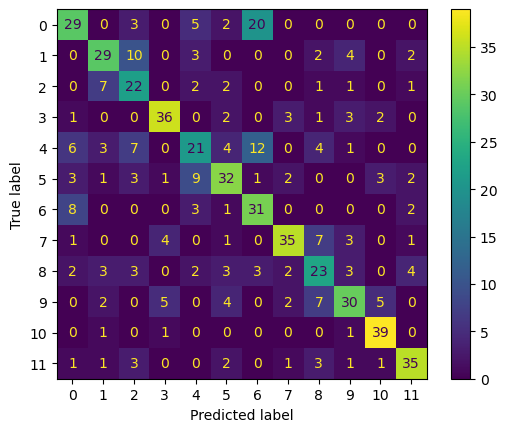

In [24]:
#Confusing Matrix for best model 

# d logistic regression model dey 

# undersampled data no feature trasnform 50 x 50 pixels strenght .001

from sklearn.metrics import confusion_matrix as confusing_matrix
from sklearn.metrics import ConfusionMatrixDisplay
model_logistic_fullsampled = linear_model.LogisticRegression(penalty = "l2", C = .001, solver="lbfgs", max_iter=80)
model_logistic_fullsampled.fit(X_train, y_train)
y_pred =  model_logistic_fullsampled.predict(X_test)
cm = confusing_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logistic_fullsampled.classes_)
plt = disp.plot()


c:\Users\usaid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


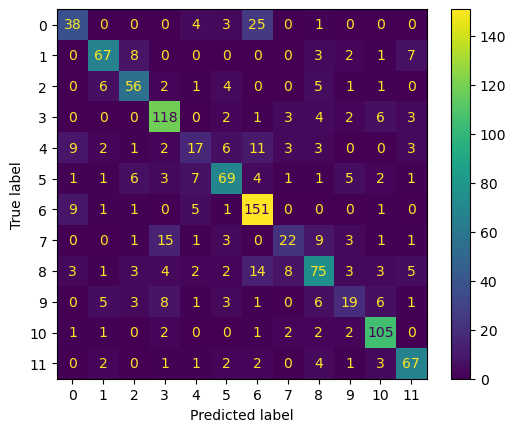

In [26]:

# full sampled data 128 x 128 no transform inverse strenght .001

model_logistic_undersampled = linear_model.LogisticRegression(penalty = "l2", C = .001, solver="lbfgs", max_iter=80)
model_logistic_undersampled.fit(X_train, y_train)
y_pred =  model_logistic_undersampled.predict(X_test)
cm = confusing_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logistic_undersampled.classes_)
plt = disp.plot()


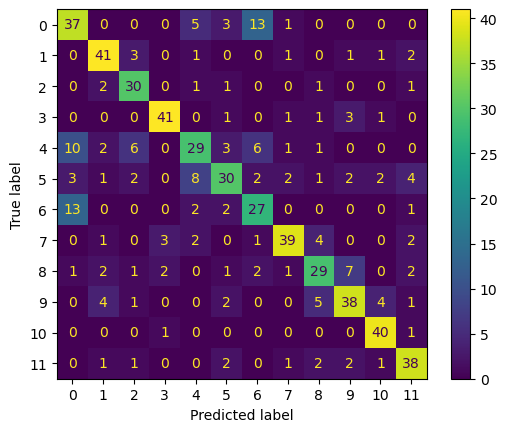

In [30]:
##NN Undersampled 72.24 RELU 200, 100, 50, 30 sterngt1 1 36x 36
Neural_network_undersampled = MLPClassifier(activation="relu", hidden_layer_sizes=[200, 100, 50, 30],
                                           alpha=1)
Neural_network_undersampled.fit(X_train, y_train)
y_pred = Neural_network_undersampled.predict(X_test)

cm = confusing_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Neural_network_undersampled.classes_)
plt = disp.plot()

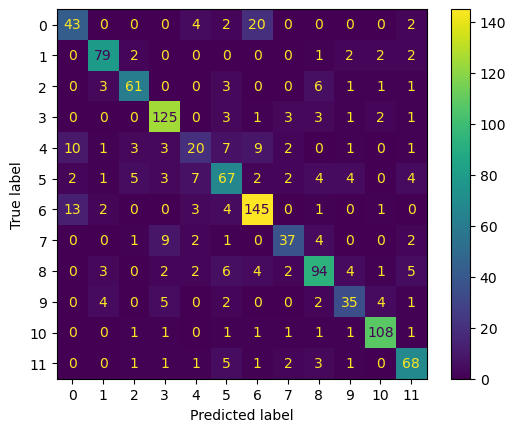

In [28]:
## full samples 200, 100, 50, 30 RELU 80.56 sternght = .001 36x 36
Neural_network_fullsampled = MLPClassifier(activation="relu", hidden_layer_sizes=[200, 100, 50, 30],
                                           alpha=.001)
Neural_network_fullsampled.fit(X_train, y_train)
y_pred = Neural_network_fullsampled.predict(X_test)
cm = confusing_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Neural_network_fullsampled.classes_)
plt = disp.plot()